# Chaotic Systems

Teng-Jui Lin

Content from UW AMATH 301, Beginning Scientific Computing. Although not covered in Spring 2020, the topic is presented in previous years: (1) [Application of Runge-Kutta to Lorenz Equation](https://www.youtube.com/watch?v=EXvLju3DLMY), (2) [Vectorized Time-step Integrators](https://www.youtube.com/watch?v=f0dRidnR2dw).

- Chaotic system
    - Lorenz system
        - One initial condition
        - Two close but distinct initial conditions
        - A cube of initial conditions
    - Visialization techniques
        - Interactive plotting
        - Animations

## Lorenz system

The Lorenz system is a system of nonlinear ODEs developed by Edward Lorenz in 1963 to model atmospheric convection. The system

$$
\begin{aligned}
\dot{x} &= \sigma (y-x) \\
\dot{y} &= x(\rho-z) - y \\
\dot{z} &= xy - \beta z
\end{aligned}
$$

with parameters $\sigma = 10, \rho = 28, \beta = 8/3$ can lead to chaotic behavior, where the behavior is unpredictable and sensitive to initial condition and error accumulation.

### One initial condition

**Problem Statement.** Solve the Lorenz system with the initial condition of $x(0) = -8, y(0) = 8, z(0) = 27$ for $t \in [0, 100]$ with $\Delta t = 0.01$ using the above parameters.

- Generate a static plot of all the trajectory in the time interval.
- Generate a rotating animation of all the trajectory in the time interval.
- Generate an animation of the trajectory over time.

Note on animation: for local reproducible results, [download ffmpeg and add to path variable](https://www.thewindowsclub.com/how-to-install-ffmpeg-on-windows-10). For reproducible results online, use Google Colab and run the command below.

In [1]:
# Run the command in Google Colab for reproducible results online
# !apt install ffmpeg

#### Solving the system and static plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import integrate

In [3]:
# Lorenz's chaotic parameters
sigma = 10
rho = 28
beta = 8/3

In [4]:
# initial conditions
initial_val = np.array([-8, 8, 27])

In [5]:
# time array
t_initial = 0
t_final = 100
dt = 0.01
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

In [6]:
# define ode system
dxdt = lambda x, y, z : sigma*(y - x)
dydt = lambda x, y, z : x*(rho - z) - y
dzdt = lambda x, y, z : x*y - beta*z
ode_syst = lambda t, v : np.array([dxdt(*v), dydt(*v), dzdt(*v)])

In [7]:
# solve ode system
ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t).y

In [8]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    'savefig.dpi': 300,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14,
    
    'animation.html': 'html5',
})

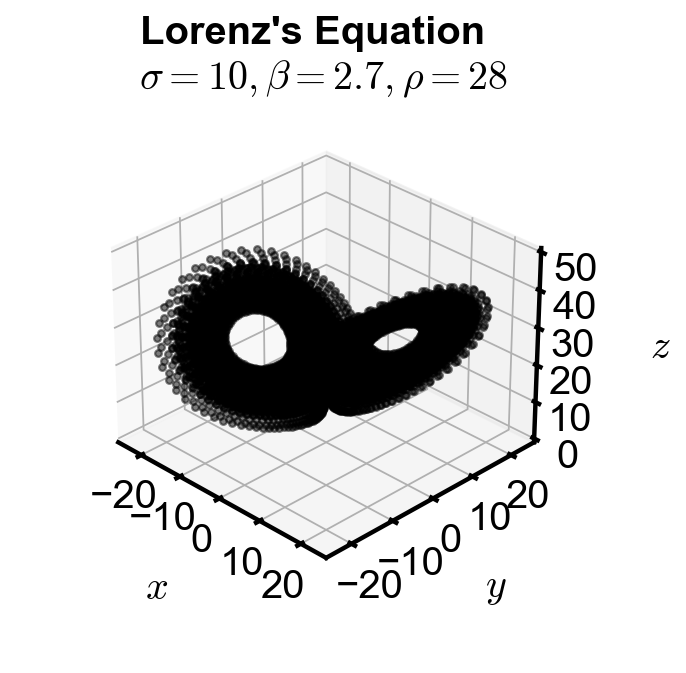

In [9]:
# plot 3d visualization
plt.rcParams.update({'xtick.labelsize': 18,})
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={"projection": "3d"})
ax.plot(*ode_soln, '.', color='black', alpha=0.5)

# plot settings
ax.set_xlabel('$x$', fontsize=18, labelpad=20)
ax.set_ylabel('$y$', fontsize=18, labelpad=20)
ax.set_zlabel('$z$', fontsize=18, labelpad=20)
ax.set_title(f'Lorenz\'s Equation \n $\sigma={sigma}, \\beta={beta :.1f}, \\rho={rho}$', fontsize=18, y=1)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.view_init(30, -45)  # viewing angle
ax.dist = 13  # zoom out to fit all labels in

#### Rotating animation of all trajectory

In [10]:
# plot static portion
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "3d"})
ax.plot(*ode_soln, '.', color='black', alpha=0.5)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.set_axis_off()

def draw_frame(n):
    '''
    Commands to update parameters.
    Here, the viewing angle changes each frame.
    '''
    ax.view_init(elev=0, azim=360*n/(frame_num))
    return fig,

# create animation of given time length
# note here we fit all the data points into the given animation time
from matplotlib import animation
anim_time = 4  # s
fps = 60
frame_num = int(fps * anim_time)
anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)

plt.close()  # disable showing initial frame

In [11]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

#### Animation of trajectory over time

In [12]:
# interactive plot
%matplotlib qt

# plot static portion
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "3d"})
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.set_axis_off()

# plot empty framework
points, = ax.plot([], [], [], '.', color='black', alpha=0.5)
title = ax.set_title('')

# update changes each frame
for n in range(frame_num):
    time_points = round(t_len/frame_num)
    points.set_data(ode_soln[:2, :time_points*n+time_points])
    points.set_3d_properties(ode_soln[2, :time_points*n+time_points])
    title.set_text(f't = {t[n] :.3f}')
    plt.pause(0.0001)

In [13]:
# back to static plot and animations
%matplotlib inline

# plot static portion
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "3d"})
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.set_axis_off()

# plot empty framework
points, = ax.plot([], [], [], '.', color='black', alpha=0.5)
title = ax.set_title('')

def draw_frame(n):
    '''
    Commands to update parameters.
    Here, the 3d data points changes each frame.
    '''
    num_points = round(t_len/frame_num)
    points.set_data(ode_soln[:2, :num_points*n+num_points])
    points.set_3d_properties(ode_soln[2, :num_points*n+num_points])
    title.set_text(f't = {t[n] :.3f}')
    return fig,

# create animation of given time length
# note here we fit all the data points into the given animation time
from matplotlib import animation
anim_time = 4  # s
fps = 60
frame_num = int(fps * anim_time)
anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)

plt.close()  # disable showing initial frame

In [14]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

### Two initial conditions

Because Lorenz system with the above parameter is a chaotic system, it is sensitive to changes in initial conditions and error accumulation. We show this using the trajectory of two close but distinct initial conditions.

**Problem Statement.** Solve the Lorenz system with the two initial conditions of

- $x(0) = -8, y(0) = 8, z(0) = 27$
- $x(0) = -8.01, y(0) = 8, z(0) = 27$

for $t \in [0, 100]$ with $\Delta t = 0.01$ using the above parameters.

- Generate a static plot of all the trajectory in the time interval.
- Generate an rotating animation of all the trajectory in the time interval.
- Generate an interactive plot of the trajectory over time. Save the the interactive plot as an animation.

#### Solving the systems and static plot

In [15]:
# Lorenz's chaotic parameters
sigma = 10
rho = 28
beta = 8/3

In [16]:
# initial conditions
initial_val1 = np.array([-8, 8, 27])
initial_val2 = np.array([-8.01, 8, 27])

In [17]:
# time array
t_initial = 0
t_final = 100
dt = 0.01
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

In [18]:
# define ode system
dxdt = lambda x, y, z : sigma*(y - x)
dydt = lambda x, y, z : x*(rho - z) - y
dzdt = lambda x, y, z : x*y - beta*z
ode_syst = lambda t, v : np.array([dxdt(*v), dydt(*v), dzdt(*v)])

In [19]:
# solve ode system
ode_soln1 = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val1, t_eval=t).y
ode_soln2 = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val2, t_eval=t).y

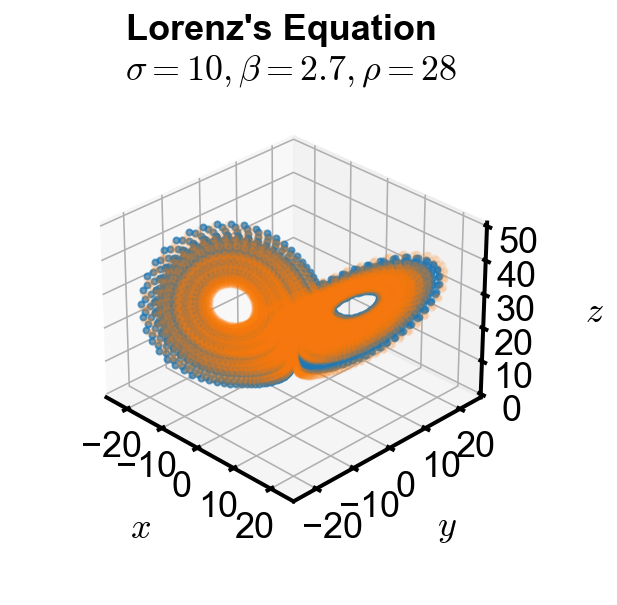

In [20]:
# plot 3d visualization
plt.rcParams.update({'xtick.labelsize': 18,})
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={"projection": "3d"})
ax.plot(*ode_soln1, '.', alpha=0.7)
ax.plot(*ode_soln2, '.', alpha=0.1)

# plot settings
ax.set_xlabel('$x$', fontsize=18, labelpad=20)
ax.set_ylabel('$y$', fontsize=18, labelpad=20)
ax.set_zlabel('$z$', fontsize=18, labelpad=20)
ax.set_title(f'Lorenz\'s Equation \n $\sigma={sigma}, \\beta={beta :.1f}, \\rho={rho}$', fontsize=18, y=1)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.view_init(30, -45)  # viewing angle
ax.dist = 13  # zoom out to fit all labels in

#### Rotating animation of all trajectory

In [21]:
# plot static portion
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "3d"})
ax.plot(*ode_soln1, '.', alpha=0.7)
ax.plot(*ode_soln2, '.', alpha=0.1)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.set_axis_off()

def draw_frame(n):
    '''
    Commands to update parameters.
    Here, the viewing angle changes each frame.
    '''
    ax.view_init(elev=0, azim=360*n/(frame_num))
    return fig,

# create animation of given time length
# note here we fit all the data points into the given animation time
from matplotlib import animation
anim_time = 4  # s
fps = 60
frame_num = int(fps * anim_time)
anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)

plt.close()  # disable showing initial frame

In [22]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

#### Interactive plot and animation of trajectory over time

In [23]:
# interactive plot
%matplotlib qt

# plot static portion
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "3d"})
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.set_axis_off()

# plot empty framework
points1, = ax.plot([], [], [], '.', alpha=0.7)
points2, = ax.plot([], [], [], '.', alpha=0.1)
title = ax.set_title('')

# update changes each frame
for n in range(frame_num):
    time_points = round(t_len/frame_num)
    points1.set_data(ode_soln1[:2, :time_points*n+time_points])
    points1.set_3d_properties(ode_soln1[2, :time_points*n+time_points])
    points2.set_data(ode_soln2[:2, :time_points*n+time_points])
    points2.set_3d_properties(ode_soln2[2, :time_points*n+time_points])
    title.set_text(f't = {t[n] :.3f}')
    plt.pause(0.00001)

In [24]:
# back to static plot and animations
%matplotlib inline

# plot static portion
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "3d"})
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)
ax.set_axis_off()

# plot empty framework
points1, = ax.plot([], [], [], '.', alpha=0.7)
points2, = ax.plot([], [], [], '.', alpha=0.1)
title = ax.set_title('')

def draw_frame(n):
    '''
    Commands to update parameters.
    Here, the 3d data points and title changes each frame.
    '''
    time_points = round(t_len/frame_num)
    points1.set_data(ode_soln1[:2, :time_points*n+time_points])
    points1.set_3d_properties(ode_soln1[2, :time_points*n+time_points])
    points2.set_data(ode_soln2[:2, :time_points*n+time_points])
    points2.set_3d_properties(ode_soln2[2, :time_points*n+time_points])
    title.set_text(f't = {t[n] :.3f}')
    return fig,

# create animation of given time length
# note here we fit all the data points into the given animation time
from matplotlib import animation
anim_time = 4  # s
fps = 60
frame_num = int(fps * anim_time)
anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)

plt.close()  # disable showing initial frame

In [25]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

The above three plots/animations demonstrates that even with very small change in initial conditions, the chaotic nature of the Lorenz system gives vastly different trajectories.